In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

tf.reset_default_graph()

DimXY = 2  # 입력 파라미터 수(=2차원)
N_class = 3  # 라벨수
N = 100  # 분류당 샘플수


xy_data = np.loadtxt('data_cop.txt')
label_data = np.loadtxt('label_cop.txt')

#훈련과 테스트로 데이타 분리 --------------------------------
test_size = 100
test_mask = np.random.choice(N_class*N, test_size)
all_entry = np.arange(0, N_class*N)
train_mask = np.array([v for v in all_entry if v not in test_mask ])

xy_train = xy_data[train_mask]
label_train = label_data[train_mask]

xy_test = xy_data[test_mask]
label_test = label_data[test_mask]
#-------------------------------------------------------------


X = tf.placeholder("float",[None, 2])
Y = tf.placeholder("float",[None, 3])


L=10
W12 = tf.Variable(tf.random_uniform([DimXY, L],0, 1))
b12 = tf.Variable(tf.zeros([1,L]))
Layer_1=tf.sigmoid(tf.matmul(X,W12) + b12)


W3 = tf.Variable(tf.random_uniform([L, N_class], 0, 1))
b3 = tf.Variable(tf.zeros([N_class]))
Out= tf.nn.softmax(tf.matmul(Layer_1,W3) + b3)

loss = tf.reduce_sum(-Y*tf.log(Out))

epslion = 0.001
optimizer = tf.train.GradientDescentOptimizer(epslion)
train = optimizer.minimize(loss)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y,1),tf.argmax(Out,1)),tf.float32))

init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for step in range(20000):
        _, loss_value, accuracy = sess.run([train, loss, acc], feed_dict={X: xy_train, Y: label_train})
        if  step % 2000 == 0:
            print('손실 %8.4f 정확도 %.4f' %(loss_value,accuracy))
    save_path = saver.save(sess, "./cop02.ckpt")


손실 262.3419 정확도 0.3395
손실 116.9728 정확도 0.7395
손실  97.9051 정확도 0.8186
손실  86.0542 정확도 0.8465
손실  79.5592 정확도 0.8419
손실  76.2510 정확도 0.8419
손실  74.2894 정확도 0.8465
손실  72.8409 정확도 0.8605
손실  71.6376 정확도 0.8605
손실  70.5927 정확도 0.8558


INFO:tensorflow:Restoring parameters from ./cop02.ckpt
테스트 정확도 0.8500


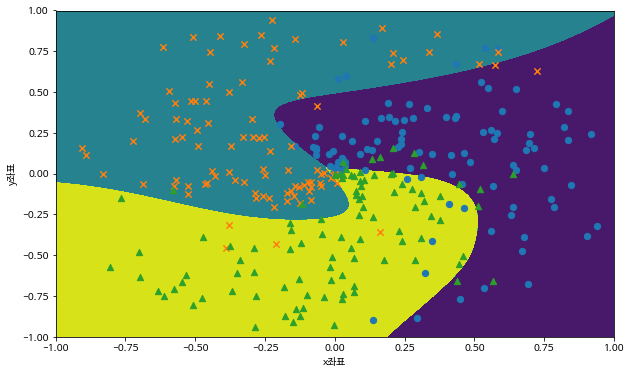

In [4]:
   
saver = tf.train.Saver()

h = 0.001
x_min, x_max = -1, 1
y_min, y_max = -1, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_range = np.c_[xx.ravel(), yy.ravel()]

sess = tf.InteractiveSession()
saver.restore(sess, "./cop02.ckpt") 
score = sess.run(Out, feed_dict={X:X_range})

#테스트 정확도
acc_test = sess.run(acc, feed_dict={X: xy_test, Y: label_test})
sess.close()    

print('테스트 정확도 %.4f' %acc_test)

plt.figure(figsize=(10, 6))
plt.xlabel('x좌표')
plt.ylabel('y좌표')
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)

markers = ['o', 'x', '^']
for i in range(N_class):
    plt.scatter(xy_data[i*N:(i+1)*N,0], xy_data[i*N:(i+1)*N,1], s=40, marker=markers[i])

plt.show()